# Next Steps in your Python Journey

# 0. Take the SEABC Course in Sept. 2022

This RJC course is a _very_ pared down version of the full course which will be offered through SEABC starting in September 2022. 

If you _really_ want to learn Python, then what better way to do than to put up $650 knowing that you will only get reimbursed when you pass the course? 

# 1. Learn additional tools

## A. Papermill

**Automate running Jupyter Notebooks**

[Papermill Example](Papermill_Example.ipynb)

## B. Learn one or more structural analysis libraries

See linked notebook below for a list.

[Structural analysis libraries](Python_Structural_Analysis_Libraries.ipynb)

## C. Learn a plotting library

Two excellent ones include:

1. [Matplotlib](https://matplotlib.org/) - Like plotting in MatLab...but in Python. Wide variety of plot styles. "Plot anything".
2. [Plotly](https://plotly.com/python/) - Beautiful, easy, interactive plotting

```python
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()
```

# 3. Further Resources

## 1. Practical Business Python
http://pbpython.com/roadmap.html

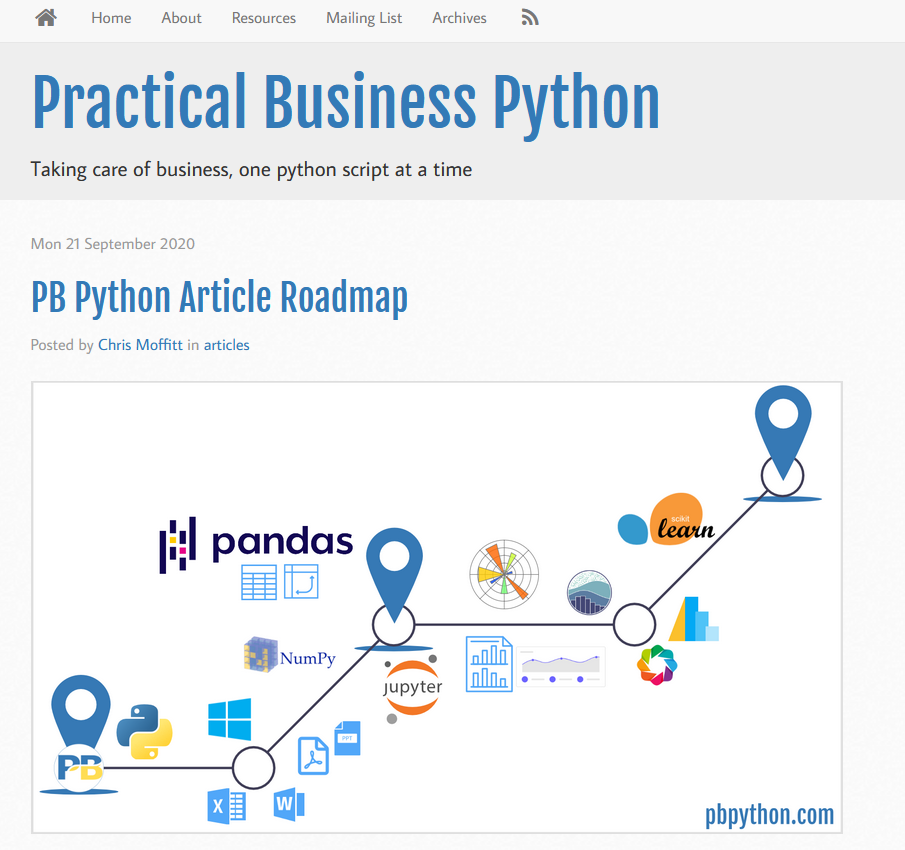

# 2. RealPython.com

An excellent site for tutorials and articles. Some articles are for paid members but many of the best ones are free.

http://realpython.com

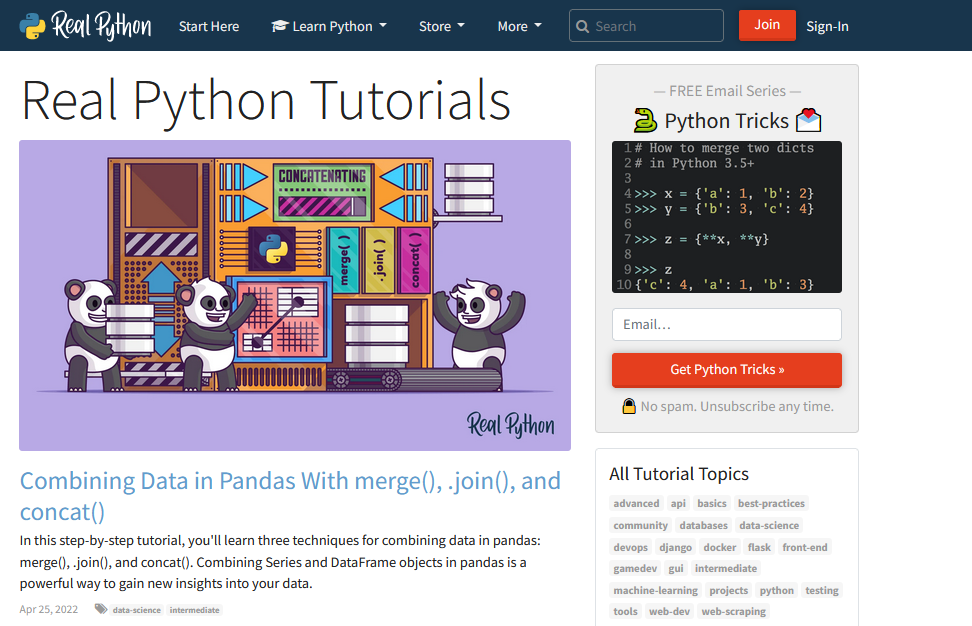

## 3. TalkPython.fm

A weekly podcast that delves deep on a particular Python topic or application. 

https://talkpython.fm/episodes/all

### Some past episodes of note:

#### Python in building and architecture
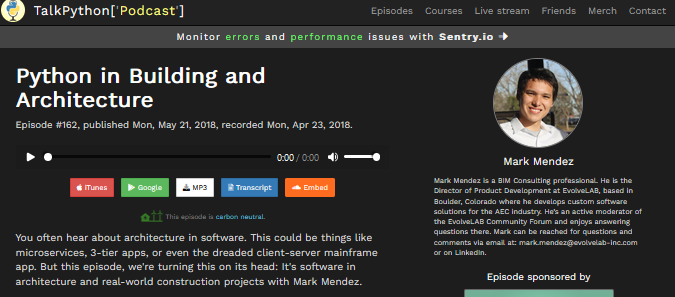

https://talkpython.fm/episodes/show/162/python-in-building-and-architecture

#### Python in engineering
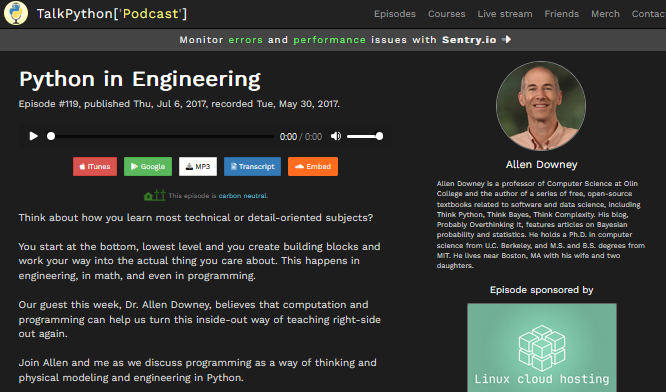

https://talkpython.fm/episodes/show/119/python-in-engineering

#### Python at NASA's Jet Propulsion Laboratory
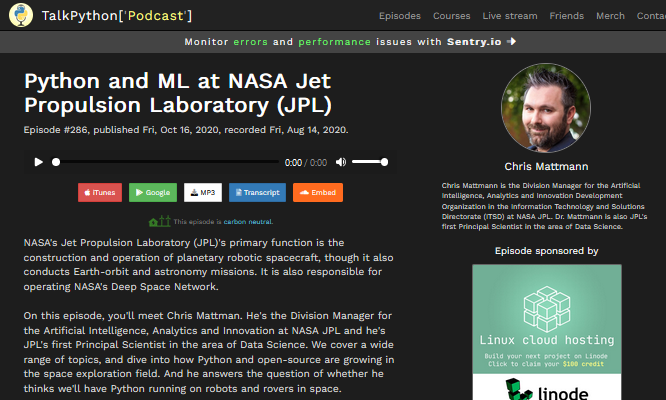

https://talkpython.fm/episodes/show/286/python-and-ml-at-nasa-jet-propulsion-laboratory-jpl

# 4. Use Jupyter. Use Jupyter often.

When should you try using Python? If you find yourself about to embark on a task that is going to require a lot of repetitive work and you just _feel_ or __know__ that there is probably a more efficient way of doing it than by copy-pasting or clicking around a bunch of windows for 30 minutes then you should probably try using Python.

If you find yourself in this kind of situation but do not know where to start, __call me__ and I will be happy to get you pointed in the right direction.

## Jupyter everywhere

Jupyter can run almost anywhere these days. Here are some ways you can use it on your phone!

# iOS

## Carnets

https://apps.apple.com/us/app/carnets-jupyter/id1450994949
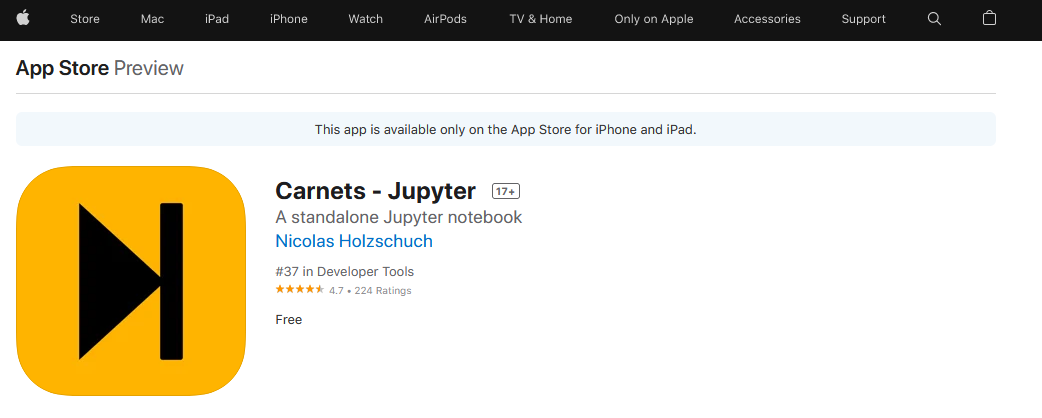


## Juno

https://apps.apple.com/us/app/juno/id1462586500
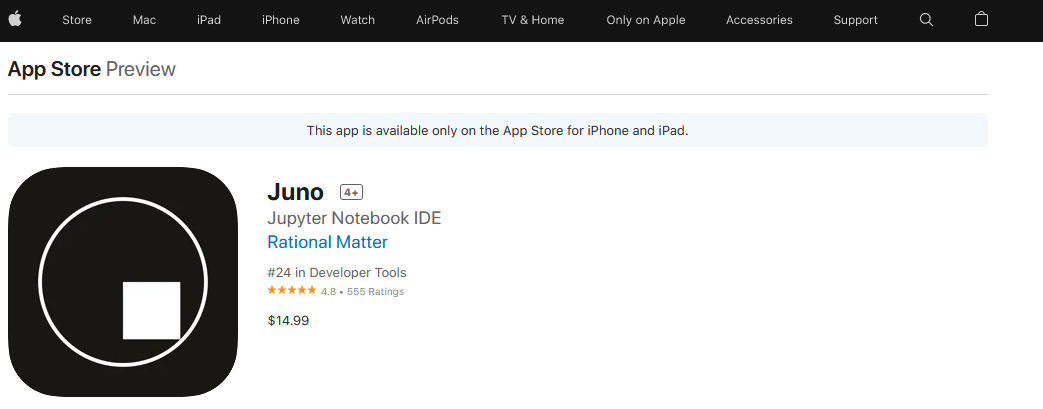

# Android

## Pydroid3

https://play.google.com/store/apps/details?id=ru.iiec.pydroid3

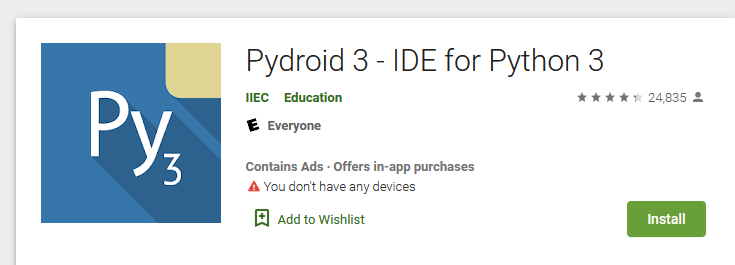